Data Analysis for pokemon teams!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pokemon_module as pk
import DistributionTesting as dt
from fitter import Fitter
from fitter import get_common_distributions

In [2]:
#Define the team pokemon to import data
eliteteam = set(['dewgong','cloyster','slowbro','jynx','lapras','onix','hitmonchan','hitmonlee','machamp','gengar',
             'golbat','haunter','arbok','gengar','gyarados','dragonair','aerodactyl','dragonite'])
ourteam = set(['gyarados','zapdos','moltres','articuno','mew','mewtwo'])
'''ourteam = set(['gyarados','blastoise','articuno','zapdos','moltres','mew','mewtwo','charizard','poliwrath','alakazam',
           'dragonite','magneton','gengar','machamp','primeape','hitmonlee','hitmonchan','poliwrath','vaporeon',
           'snorlax','chansey','wigglytuff','muk','exeggutor','pidgeot',"farfetch'd",'dodrio','venusaur','onix','rhydon','growlithe','lapras'])
           '''

'ourteam = set([\'gyarados\',\'blastoise\',\'articuno\',\'zapdos\',\'moltres\',\'mew\',\'mewtwo\',\'charizard\',\'poliwrath\',\'alakazam\',\n           \'dragonite\',\'magneton\',\'gengar\',\'machamp\',\'primeape\',\'hitmonlee\',\'hitmonchan\',\'poliwrath\',\'vaporeon\',\n           \'snorlax\',\'chansey\',\'wigglytuff\',\'muk\',\'exeggutor\',\'pidgeot\',"farfetch\'d",\'dodrio\',\'venusaur\',\'onix\',\'rhydon\',\'growlithe\',\'lapras\'])\n           '

In [20]:
#len(eliteteam)
len(ourteam)

31

In [5]:
#Dictionary in {Pokemon name:Pokemon class format}
names = eliteteam.union(ourteam)
pokemon_dict = {}
for pokemon_name in names: #for every pokemon in gen 1
    #assign a class as a member of the dictionary
    pokemon_dict[pokemon_name] = pk.Pokemon(pokemon_name)
    

In [68]:
#Import data as a dictionary of dataframes:
#Note: this is based on 
healthpercents = [100,75,50,25]
options = ['heals','noheals']
win_dataframes = {}
timesdataframes = {}
healthdataframes={}
for perc in healthpercents:
    for opt in options:
        fullstring = "Output_data_files/100runs%dhp_" % (perc) + opt
        halfstring = "%dhp_" % (perc) + opt
        win_dataframes[halfstring] = pd.read_csv(fullstring + '_wins.csv',index_col='name')
        timesdataframes[halfstring] = pd.read_csv(fullstring + '_times.csv')
        healthdataframes[halfstring] = pd.read_csv(fullstring + '_health.csv')

    #totalresultsframe.to_csv(stringhp+'_wins.csv')
    #writetocsv(stringhp+'_times.csv',time_dict)
    #writetocsv(stringhp+'_health.csv',health_left)

In [108]:
#Import data as a dictionary of dataframes:
# health 2: runs that did not set negative hp to zero
healthpercents = [100,75,50,25]
options = ['heals','noheals']
healthdataframes2={}
for perc in healthpercents:
    for opt in options:
        fullstring = "Output_data_files/100runs%dhp_" % (perc) + opt
        halfstring = "%dhp_" % (perc) + opt
        #print(fullstring)
        #print(halfstring)
        healthdataframes2[halfstring] = pd.read_csv(fullstring + '_health2.csv')

In [66]:
len(win_dataframes)

8

In [ ]:
#tbh I don't remember what this was for
'''
hdf_adjusted = {}
for df in healthdataframes:
    hdf_adjusted[df] = healthdataframes[df][]
'''

In [67]:
win_dataframes['100hp_heals']['mewtwo']['articuno']

56

(array([59.,  2.,  6.,  4.,  7.,  5.,  2.,  3.,  5.,  7.]),
 array([0.    , 0.0891, 0.1782, 0.2673, 0.3564, 0.4455, 0.5346, 0.6237,
        0.7128, 0.8019, 0.891 ]),
 <BarContainer object of 10 artists>)

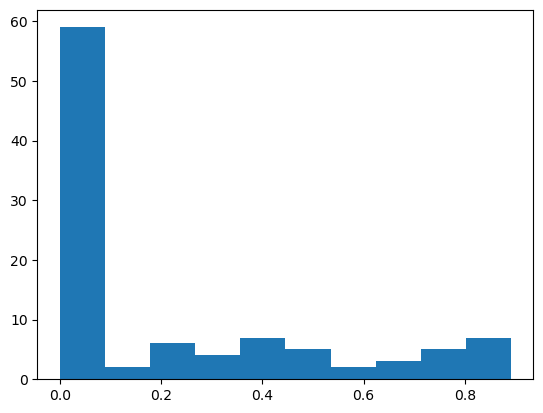

In [6]:
plt.hist(dataframes['100hp_heals_health']["('mewtwo', 'articuno')"])

In [92]:
def getdata(pokemona,pokemonb,whichtype,rem_zeros = True):
    '''Create a list of 8 series of data between two pokemon using the dictionaries 
    healthdataframes or timesdataframes.
    0. 100 percent heals. 1: 100 percent no heals.
    2. 75 percent heals.  3. 75 percent no heals.
    4. 50 percent heals.  5. 50 percent no heals.
    6. 25 percent heals.  7. 25 percent no heals'''
    datalist = []
    if whichtype == 'health':
        current_dict = healthdataframes
    if whichtype == 'times':
        current_dict = timesdataframes
    rownum = 0
    while rownum < 4:
        colnum = 0
        while colnum < 2:
            halfstring = "%dhp_%s" % (healthpercents[rownum],options[colnum])
            data = current_dict[halfstring]
            array = data["('%s', '%s')" % (pokemona,pokemonb)]
            if rem_zeros:
                array = array.iloc[array.to_numpy().nonzero()]
            datalist.append(array)
            colnum +=1
        rownum+=1
        
    return datalist

In [94]:
ga = getdata('gyarados','articuno','times')
len(ga)

8

In [112]:
def plothists(pokemona,pokemonb,whichplot):
    '''Whichplot = times or health
    Plot 8 histograms of the battle between pokemon a and b''' 
    figure, axis = plt.subplots(4,2)
    if whichplot == 'health':
        titlename = "Remaining Health"
        current_dict = healthdataframes2
    if whichplot == 'times':
        titlename = "Number of Turns"
        current_dict = timesdataframes
    figure.suptitle("%s, %s vs %s" % (titlename,pokemona,pokemonb))
    rownum = 0
    colnum = 0
    while rownum < 4:
        colnum = 0
        while colnum < 2:
            halfstring = "%dhp_%s" % (healthpercents[rownum],options[colnum])
            data = current_dict[halfstring]
            array = data["('%s', '%s')" % (pokemona,pokemonb)]
            #array = array.iloc[array.to_numpy().nonzero()]

            axis[rownum,colnum].hist(array)
            axis[rownum,colnum].set_title("%d percent,%s" % (healthpercents[rownum],options[colnum]))
            colnum += 1
        rownum += 1
    plt.tight_layout()
    return

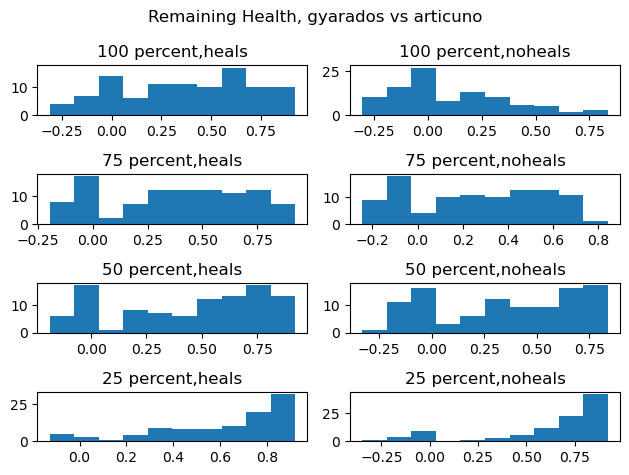

In [113]:
plothists('gyarados','articuno','health')

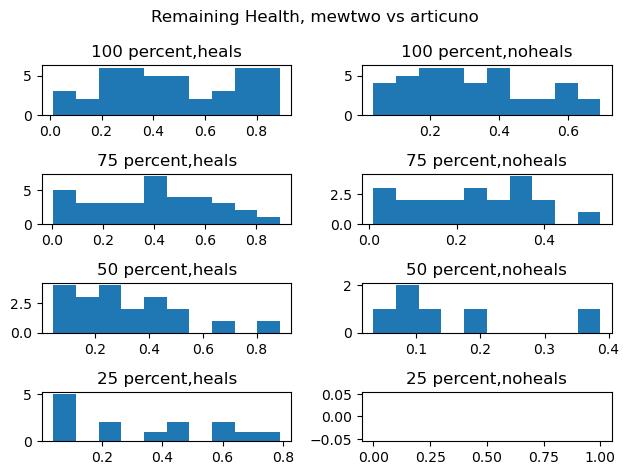

In [102]:
plothists('mewtwo','articuno','health')

In [119]:
f = Fitter(healthdataframes2['100hp_heals']['(\'mewtwo\', \'articuno\')'])

2024-05-20 19:28:04.504 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-05-20 19:28:05.968 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=1.150763)
2024-05-20 19:28:07.535 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=1.207987)
2024-05-20 19:28:11.399 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=1.115797)
2024-05-20 19:28:11.968 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=1.131802)
2024-05-20 19:28:12.601 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=1.127086)
2024-05-20 19:28:12.932 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=1.156053)
2024-05-20 19:28:14.731 | INFO     | fitter.fitter:_fit_single_distribution:337 -

                    sumsquare_error         aic         bic  kl_div  \
laplace_asymmetric         1.088928  705.690561  713.506072     inf   
skewcauchy                 1.095150  750.741763  758.557274     inf   
triang                     1.097378  658.942652  666.758163     inf   
skewnorm                   1.104358  677.521397  685.336907     inf   
johnsonsb                  1.104943  653.142567  663.563248     inf   

                    ks_statistic  ks_pvalue  
laplace_asymmetric      0.129248   0.064606  
skewcauchy              0.162771   0.008785  
triang                  0.096533   0.290046  
skewnorm                0.100805   0.244546  
johnsonsb               0.086621   0.417449  


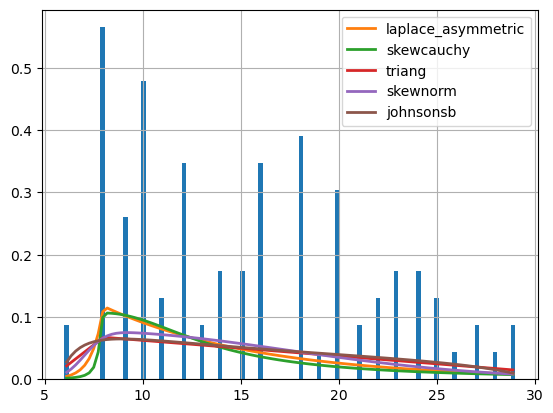

In [121]:
#f = Fitter(ga[0])
f.fit()
print(f.summary())

In [122]:
f2 = Fitter(healthdataframes2['100hp_heals']['(\'mewtwo\', \'articuno\')'],distributions = get_common_distributions())

2024-05-20 19:35:35.162 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=122.42335)
2024-05-20 19:35:35.627 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=115.927189)
2024-05-20 19:35:36.545 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=118.055556)
2024-05-20 19:35:42.005 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=124.468204)
2024-05-20 19:35:42.007 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=117.165986)
2024-05-20 19:35:42.139 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=108.05929)
2024-05-20 19:35:42.572 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=107.585309)
2024-05-20 19:35:43.303 | INFO     | fitter.fitter:_fit_single_distribution:337

          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm        107.585309   99.955027  107.770538     inf      0.137659   
gamma          108.059290   90.545387   98.360897     inf      0.141382   
exponpow       112.103864   69.798618   77.614128     inf      0.157125   
rayleigh       115.927189   78.717383   83.927724     inf      0.204747   
cauchy         117.165986  175.999571  181.209912     inf      0.191842   

          ks_pvalue  
lognorm    0.040897  
gamma      0.033096  
exponpow   0.012699  
rayleigh   0.000374  
cauchy     0.001069  


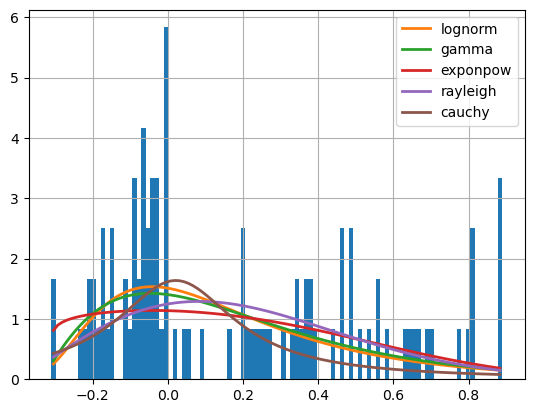

In [123]:
f2.fit()
print(f2.summary())

2024-05-20 10:03:04.470 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-05-20 10:03:04.580 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=8.230821)
2024-05-20 10:03:04.636 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=8.40985)
2024-05-20 10:03:04.639 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=8.48949)
2024-05-20 10:03:04.818 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=8.859519)
2024-05-20 10:03:05.118 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=8.218434)
2024-05-20 10:03:05.120 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=8.125855)
2024-05-20 10:03:05.142 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fi

          sumsquare_error         aic         bic  kl_div  ks_statistic  \
rdist            7.670777         inf         inf     inf      0.604447   
dgamma           8.018315  646.781262  654.596772     inf      0.152611   
dweibull         8.041167  646.331784  654.147295     inf      0.143258   
loggamma         8.123372  627.339499  635.155009     inf      0.122858   
foldnorm         8.123414  619.497115  627.312626     inf      0.125502   

             ks_pvalue  
rdist     1.577573e-35  
dgamma    1.688720e-02  
dweibull  2.968456e-02  
loggamma  8.969135e-02  
foldnorm  7.846537e-02  


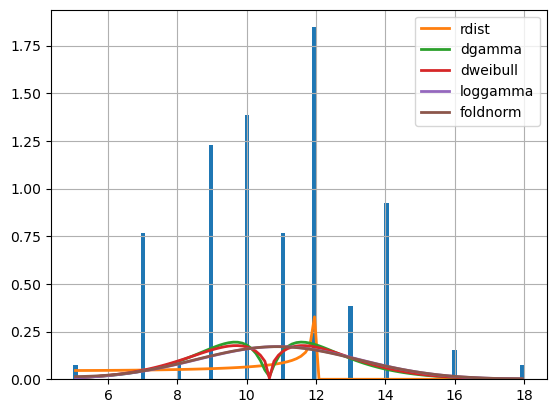

In [52]:
f.fit()
print(f.summary())

In [99]:
#retrieve data for every pairing in our team vs elite team
timedatadicts = {}
healthdatadicts = {}
for challenger in ourteam:
    for defender in eliteteam:
        timedatadicts[(challenger,defender)] = getdata(challenger,defender,'times')
        healthdatadicts[(challenger,defender)] = getdata(challenger,defender,'health')
        timedatadicts[(defender,challenger)] =getdata(defender,challenger,'times')
        healthdatadicts[(defender,challenger)] = getdata(defender,challenger,'health')

In [101]:
len(timedatadicts)

203

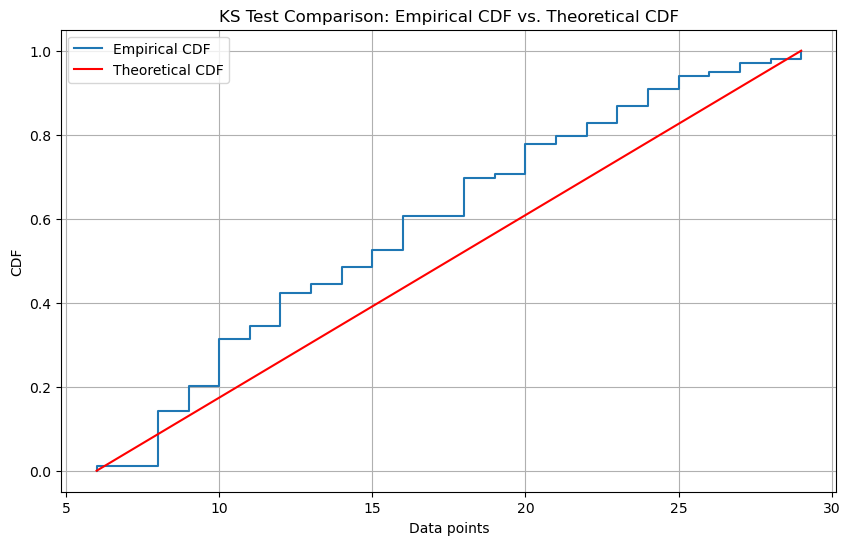

KS statistic: 0.17826086956521736
P-value: 0.0029872266790237356


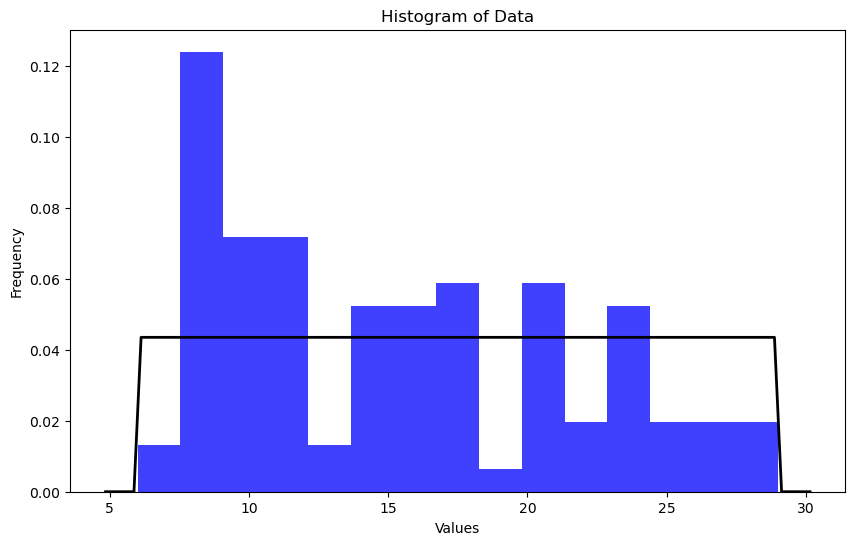

In [96]:
dt.run_KS_unif(ga[0])